In [6]:
#OPENCV implementation

import cv2
import matplotlib.pyplot as plt
import numpy as np

from skimage import morphology


## gabor

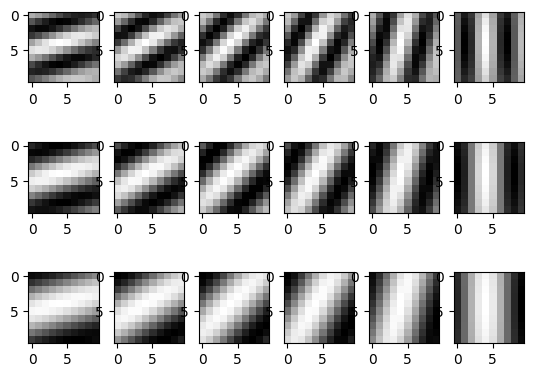

In [7]:
class Gabor():
    def __init__(self, R, C, n_orientation, scale):
        self.R = R
        self.C = C
        self.n_orientation = n_orientation
        self.scale = scale
        self.orientation = np.array([ (u * np.pi / n_orientation) for u in range (1, n_orientation + 1)])
        self.gabor_filters_sets = [gabor_wavelet(R, C, u, scale, n_orientation) for u in range(1, n_orientation + 1)]

    
    # filter image through gabor filter
    def filtering(self, img):
        graphs = np.array([cv2.filter2D(img, -1, np.real(gw)) for gw in self.gabor_filters_sets])
        return graphs
    
    def plot_filters(self, n_scale):
        gabor_filters = []
        fig = plt.figure()
        for v in range (1, n_scale + 1):
            for u in range(1, self.n_orientation + 1):
                gw = gabor_wavelet(self.R, self.C, u, v , self.n_orientation)
                fig.add_subplot(n_scale, self.n_orientation, self.n_orientation * (v- 1) + u)
                plt.imshow(np.real(gw), cmap='gray')
        plt.show()

    

def gabor_wavelet(rows, cols, orientation, scale, n_orientation):
    
    kmax = np.pi / 2        # 1.5707963267948966
    f = np.sqrt(2)          # 1.4142135623730951 
    delt2 = (2 * np.pi) ** 2

    k = (kmax / (f ** scale)) * np.exp(1j * orientation * np.pi / n_orientation / 2)
    kn2 = np.abs(k) ** 2
    gw = np.zeros((rows, cols), np.complex128)

    for m in range(int(-rows / 2) + 1, int(rows / 2) + 1):
        for n in range(int(-cols / 2) + 1, int(cols / 2) + 1):
            t1 = np.exp(-0.5 * kn2 * (m ** 2 + n ** 2) / delt2)
            t2 = np.exp(1j * (np.real(k) * m + np.imag(k) * n))
            t3 = np.exp(-0.5 * delt2)
            gw[int(m + rows / 2 - 1), int(n + cols / 2 - 1)] = (kn2 / delt2) * t1 * (t2 - t3)

    return gw


n_orientation = 6
scale = 2
GA = Gabor(10, 10, n_orientation, scale)
gabor_filters = GA.gabor_filters_sets
GA.plot_filters(3)


## LOG


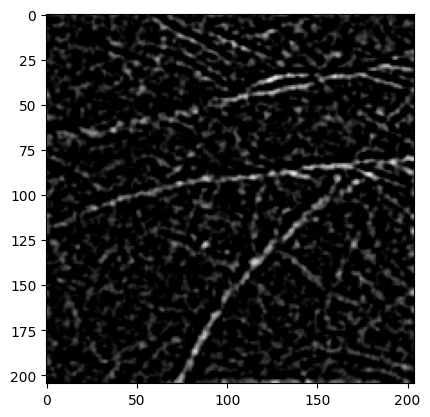

In [8]:
img = cv2.imread('rroi_test.jpg')  

RGB_img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

plt.imshow(RGB_img)

src = cv2.GaussianBlur(RGB_img, (5, 5), 0)

# converting to gray scale

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
edges = cv2.Laplacian(gray, -1, ksize=5, scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)

plt.imshow(edges, cmap='gray')


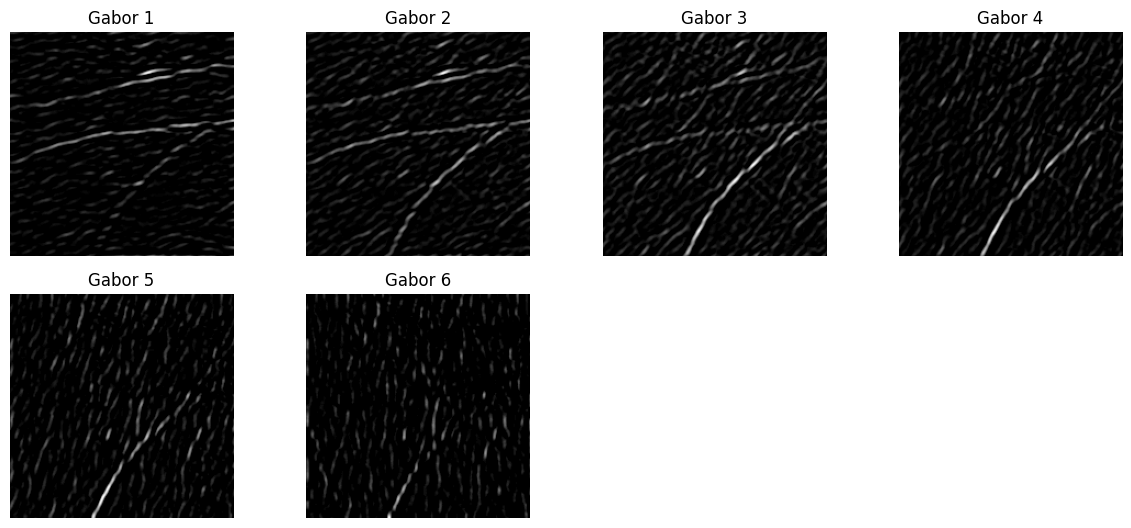

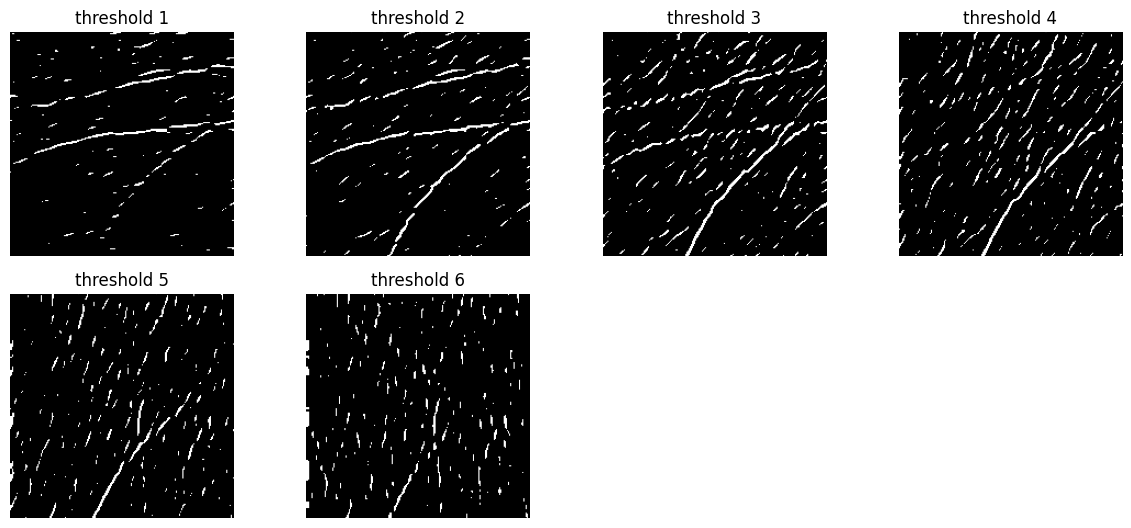

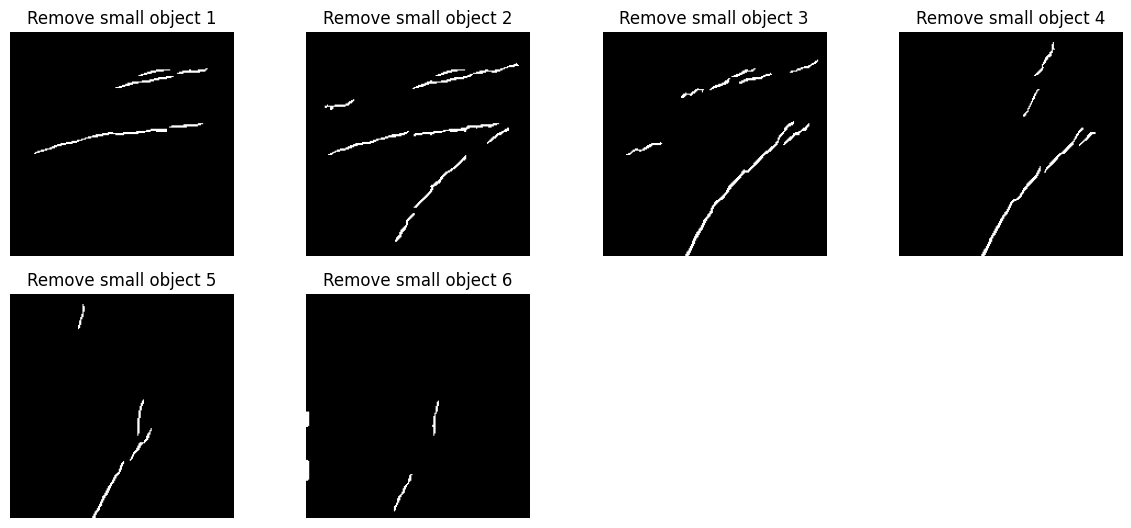

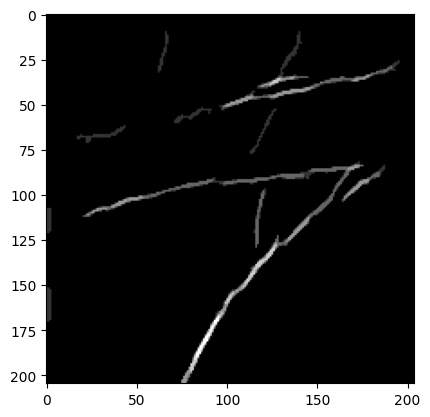

In [9]:
def show_array_img(arr, process):
    plt.figure(figsize=(12, 8))  # Đặt kích thước cửa sổ
    for idx, element in enumerate(arr):
        plt.subplot(3, 4, idx + 1)  # Sắp xếp ảnh trên lưới 3x4 (hoặc thay đổi tuỳ số lượng ảnh)
        plt.imshow(element, cmap='gray')  # Hiển thị ảnh ở dạng grayscale
        plt.title(f"{process} {idx+1}")  # Thêm tiêu đề cho từng ảnh
        plt.axis('off')  # Tắt trục toạ độ

    plt.tight_layout()  # Căn chỉnh lưới để không bị chồng lấn
    plt.show()




# Laplacian process image with above function
img = edges

# storing output after gabor filter
After_gabor = []

# Gabor process image with the first cell code above
for i, gw in enumerate(gabor_filters):
    element =  cv2.filter2D(img, -1, np.real(gw))       # filter2d image với mỗi kernel là một gabor filter 
    After_gabor.append(element)


show_array_img(After_gabor, "Gabor")


Two_value = []
for i, line in enumerate(After_gabor):
    _, TW = cv2.threshold(line, 0 , 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    kernel = np.ones((2,2), np.uint8)
    TW = cv2.erode(TW, kernel)

    Two_value.append(TW)

show_array_img(Two_value, "threshold")

con = []


for i in Two_value:
    conective = morphology.remove_small_objects(i > 0, min_size=40, connectivity=1)
    con.append(conective)
    

line = (np.sum(con, axis = 0) / len(con))

show_array_img(con, "Remove small object")

plt.imshow(line,cmap='gray')
